# Electricity Usage Prediction

https://dacon.io/competitions/official/236125/overview/description

In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [33]:
plt.rcParams['font.family'] = 'NanumGothic'

In [34]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
b_info = pd.read_csv('building_info.csv')

In [35]:
b_info

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,93314.00,60500.00,-,-,-
96,97,호텔및리조트,55144.67,25880.00,-,-,-
97,98,호텔및리조트,53578.62,17373.75,-,-,-
98,99,호텔및리조트,53499.00,40636.00,-,-,-


In [36]:
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


In [37]:
test

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77
...,...,...,...,...,...,...,...
16795,100_20220831 19,100,20220831 19,22.5,0.0,0.9,84
16796,100_20220831 20,100,20220831 20,20.7,0.0,0.4,95
16797,100_20220831 21,100,20220831 21,20.2,0.0,0.4,98
16798,100_20220831 22,100,20220831 22,20.1,0.0,1.1,97


In [38]:
# merge two dataframes
train_df = pd.merge(train, b_info, on='건물번호', how='left')
test_df = pd.merge(test, b_info, on='건물번호', how='left')

In [39]:
train_df

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,건물기타,110634.00,39570.00,-,-,-
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,건물기타,110634.00,39570.00,-,-,-
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,건물기타,110634.00,39570.00,-,-,-
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,건물기타,110634.00,39570.00,-,-,-
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,건물기타,110634.00,39570.00,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04,호텔및리조트,57497.84,40035.23,-,-,-
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96,호텔및리조트,57497.84,40035.23,-,-,-
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12,호텔및리조트,57497.84,40035.23,-,-,-
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08,호텔및리조트,57497.84,40035.23,-,-,-


In [40]:
test_df

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72,건물기타,110634.00,39570.00,-,-,-
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72,건물기타,110634.00,39570.00,-,-,-
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75,건물기타,110634.00,39570.00,-,-,-
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78,건물기타,110634.00,39570.00,-,-,-
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77,건물기타,110634.00,39570.00,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100_20220831 19,100,20220831 19,22.5,0.0,0.9,84,호텔및리조트,57497.84,40035.23,-,-,-
16796,100_20220831 20,100,20220831 20,20.7,0.0,0.4,95,호텔및리조트,57497.84,40035.23,-,-,-
16797,100_20220831 21,100,20220831 21,20.2,0.0,0.4,98,호텔및리조트,57497.84,40035.23,-,-,-
16798,100_20220831 22,100,20220831 22,20.1,0.0,1.1,97,호텔및리조트,57497.84,40035.23,-,-,-


In [41]:
train_df.isnull().sum()

num_date_time         0
건물번호                  0
일시                    0
기온(C)                 0
강수량(mm)          160069
풍속(m/s)              19
습도(%)                 9
일조(hr)            75182
일사(MJ/m2)         87913
전력소비량(kWh)            0
건물유형                  0
연면적(m2)               0
냉방면적(m2)              0
태양광용량(kW)             0
ESS저장용량(kWh)          0
PCS용량(kW)             0
dtype: int64

In [42]:
test_df.isnull().sum()

num_date_time    0
건물번호             0
일시               0
기온(C)            0
강수량(mm)          0
풍속(m/s)          0
습도(%)            0
건물유형             0
연면적(m2)          0
냉방면적(m2)         0
태양광용량(kW)        0
ESS저장용량(kWh)     0
PCS용량(kW)        0
dtype: int64

## Missing values

<Axes: >

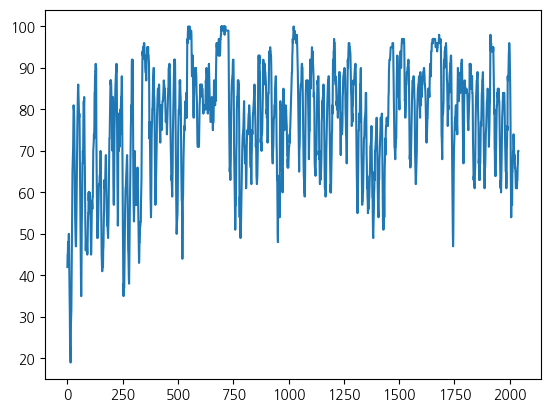

In [43]:
# 습도(%)
train_df[train_df['건물번호']==1]['습도(%)'].plot()

<Axes: >

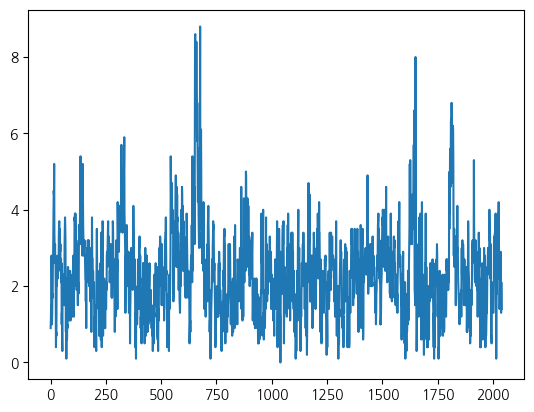

In [44]:
# 풍속(m/s)
train_df[train_df['건물번호']==1]['풍속(m/s)'].plot()

In [45]:
# Since it is the Time Series dataset fill null data by interpolate()
train_df['습도(%)'] = train_df['습도(%)'].interpolate()
train_df['풍속(m/s)'] = train_df['풍속(m/s)'].interpolate()

In [46]:
# fill null data for '강수량(mm)' with 0
train_df['강수량(mm)'].fillna(0.0, inplace=True)

In [47]:
print(len(train_df[train_df['태양광용량(kW)'] == '-']))
print(len(train_df[train_df['ESS저장용량(kWh)'] == '-']))
print(len(train_df[train_df['PCS용량(kW)'] == '-']))

130560
193800
193800


In [48]:
# drop 'ESS저장용량', 'PCS용량' since most of them are missing
train_df = train_df.drop(['ESS저장용량(kWh)', 'PCS용량(kW)'], axis=1)
test_df = test_df.drop(['ESS저장용량(kWh)', 'PCS용량(kW)'], axis=1)

'태양광' choices
- describes with 1 and 0 on whether it is with solar panels
- fill null data with 0

In [53]:
train_df['태양광용량(kW)'].value_counts()

-         130560
25          4080
20          4080
50          4080
200         4080
28.44       2040
3           2040
9.45        2040
365         2040
14.4        2040
65          2040
95          2040
60.45       2040
621         2040
100         2040
97.85       2040
98.28       2040
46.2        2040
35          2040
100.56      2040
40          2040
83.72       2040
30          2040
26.64       2040
97.65       2040
110         2040
70          2040
64.8        2040
56          2040
130.6       2040
447.2       2040
60          2040
21.6        2040
Name: 태양광용량(kW), dtype: int64

In [54]:
# fill with 0
train_df['태양광용량(kW)'] = train_df['태양광용량(kW)'].apply(lambda x: 0 if x=='-' else x)
test_df['태양광용량(kW)'] = test_df['태양광용량(kW)'].apply(lambda x: 0 if x=='-' else x)

In [55]:
# 1 = with solar panels, 0 = without solar panels
#train_df['태양광용량(kW)'] = train_df['태양광용량(kW)'].apply(lambda x: 0 if x=='-' else 1)
#test_df['태양광용량(kW)'] = test_df['태양광용량(kW)'].apply(lambda x: 0 if x=='-' else 1)

'일사', '일조' choices
- drop both '일사' and '일조'
- fill null data with 0

In [56]:
train_df['일조(hr)'].value_counts()

0.0    62896
1.0    20879
0.1     6810
0.9     5764
0.8     5315
0.3     5134
0.2     4841
0.5     4676
0.7     4311
0.6     4190
0.4     4002
Name: 일조(hr), dtype: int64

In [57]:
train_df['일사(MJ/m2)'].value_counts()

0.00    6914
0.01    2513
0.02    2058
0.04    1695
0.03    1552
        ... 
3.63       3
3.77       1
3.92       1
3.83       1
3.80       1
Name: 일사(MJ/m2), Length: 379, dtype: int64

In [58]:
# drop columns
train_df = train_df.drop(['일조(hr)', '일사(MJ/m2)'], axis=1)

In [59]:
# fill with 0
#train_df['일조(hr)'].fillna(0.0, inplace=True)
#train_df['일사(MJ/m2)'].fillna(0.0, inplace=True)

## Date variable

In [49]:
train_df['일시'] = pd.to_datetime(train_df['일시'])
test_df['일시'] = pd.to_datetime(test_df['일시'])

In [50]:
# into month, day, hour
train_df['hour'] = train_df['일시'].dt.hour
train_df['day'] = train_df['일시'].dt.day
train_df['month'] = train_df['일시'].dt.month

test_df['hour'] = test_df['일시'].dt.hour
test_df['day'] = test_df['일시'].dt.day
test_df['month'] = test_df['일시'].dt.month

## Encoding

In [51]:
train_df['건물유형'].value_counts()

건물기타       30600
공공         16320
대학교        16320
백화점및아울렛    16320
병원         16320
상용         16320
아파트        16320
연구소        16320
지식산업센터     16320
할인마트       16320
호텔및리조트     16320
데이터센터      10200
Name: 건물유형, dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_df['건물유형'] = encoder.fit_transform(train_df['건물유형'])
test_df['건물유형'] = encoder.fit_transform(test_df['건물유형'])

### EDA

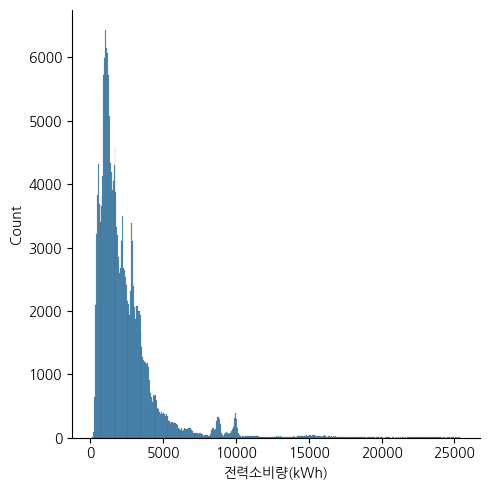

In [60]:
sns.displot(train_df['전력소비량(kWh)'])
plt.show()

<Axes: xlabel='month', ylabel='전력소비량(kWh)'>

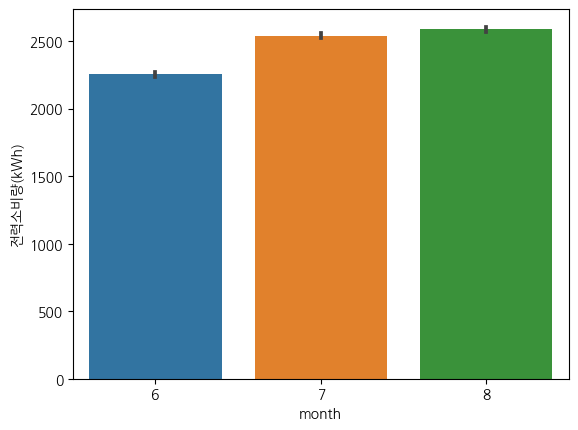

In [64]:
# monthly
# use of air conditioners in Aug
sns.barplot(data=train_df, x='month', y='전력소비량(kWh)')

<Axes: xlabel='day', ylabel='전력소비량(kWh)'>

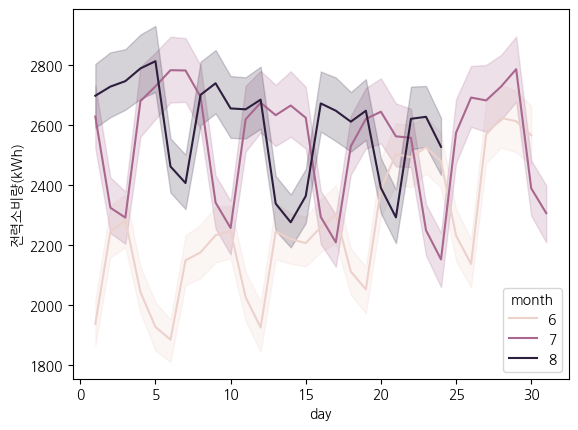

In [65]:
# daily
sns.lineplot(data=train_df, x='day', y='전력소비량(kWh)', hue='month')

<Axes: xlabel='hour', ylabel='전력소비량(kWh)'>

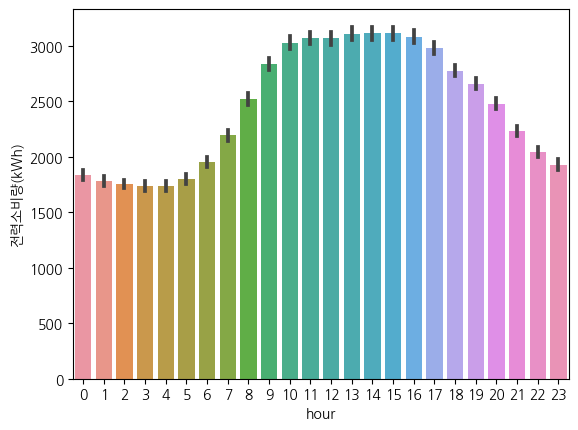

In [66]:
# time
# 23-4 no changes
# 5-9 increases
# 10-15 no changes
# 16-22 decreases
sns.barplot(data=train_df, x='hour', y='전력소비량(kWh)')

<Axes: xlabel='hour', ylabel='전력소비량(kWh)'>

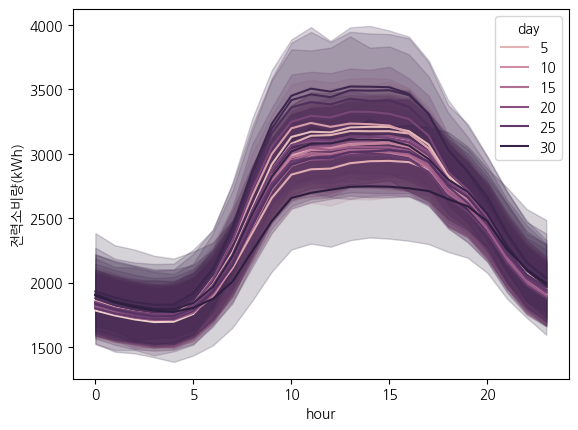

In [67]:
sns.lineplot(data=train_df, x='hour', y='전력소비량(kWh)', hue='day')

<Axes: xlabel='건물번호', ylabel='전력소비량(kWh)'>

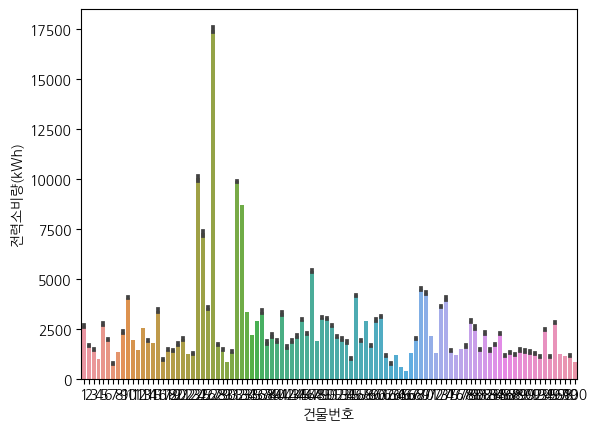

In [68]:
# buildings
sns.barplot(data=train_df, x='건물번호', y='전력소비량(kWh)')

<Axes: xlabel='건물유형', ylabel='전력소비량(kWh)'>

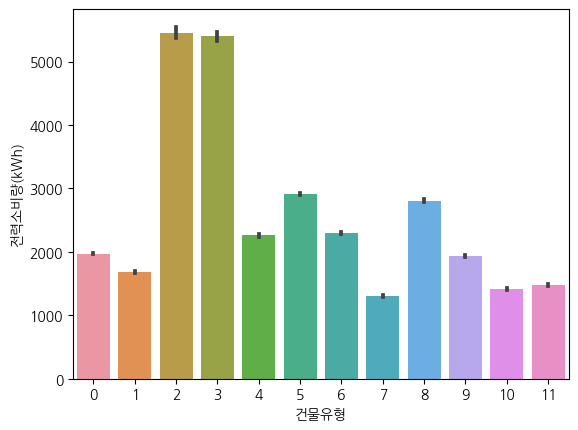

In [69]:
# building types
sns.barplot(data=train_df, x='건물유형', y='전력소비량(kWh)')

In [70]:
eda_0 = train_df[train_df['건물유형']==0]
eda_1 = train_df[train_df['건물유형']==0]
eda_2 = train_df[train_df['건물유형']==0]
eda_3 = train_df[train_df['건물유형']==0]
eda_4 = train_df[train_df['건물유형']==0]
eda_5 = train_df[train_df['건물유형']==0]
eda_6 = train_df[train_df['건물유형']==0]
eda_7 = train_df[train_df['건물유형']==0]
eda_8 = train_df[train_df['건물유형']==0]
eda_9 = train_df[train_df['건물유형']==0]
eda_10 = train_df[train_df['건물유형']==0]
eda_11 = train_df[train_df['건물유형']==0]

<Axes: xlabel='hour', ylabel='전력소비량(kWh)'>

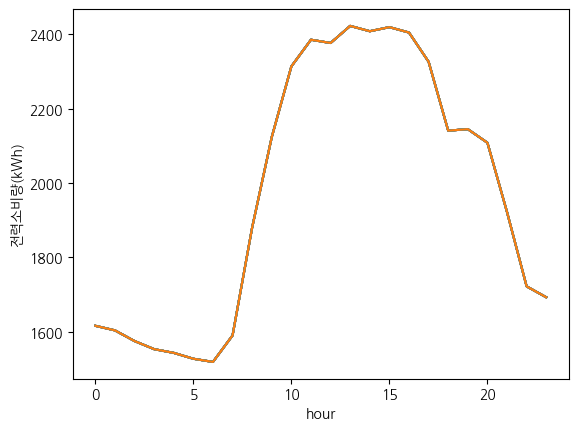

In [71]:
sns.lineplot(data=eda_0, x='hour', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_1, x='hour', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_2, x='hour', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_3, x='hour', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_4, x='hour', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_5, x='hour', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_6, x='hour', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_7, x='hour', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_8, x='hour', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_9, x='hour', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_10, x='hour', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_11, x='hour', y='전력소비량(kWh)', ci=None)

<Axes: xlabel='day', ylabel='전력소비량(kWh)'>

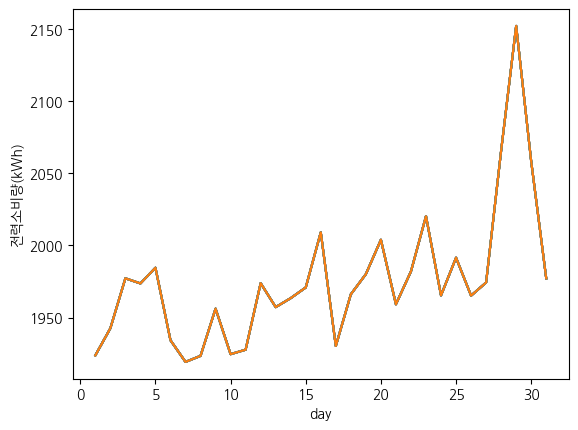

In [72]:
sns.lineplot(data=eda_0, x='day', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_1, x='day', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_2, x='day', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_3, x='day', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_4, x='day', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_5, x='day', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_6, x='day', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_7, x='day', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_8, x='day', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_9, x='day', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_10, x='day', y='전력소비량(kWh)', ci=None)
sns.lineplot(data=eda_11, x='day', y='전력소비량(kWh)', ci=None)

## Additional variables

In [73]:
# days (0 = Mon, 1 = Tue, 2 = Wed, 3 = Thu, 4 = Fri, 5 = Sat, 6 = Sun)
train_df['요일'] = train_df['일시'].apply(lambda x: x.weekday())
test_df['요일'] = test_df['일시'].apply(lambda x: x.weekday())
train_df

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),hour,day,month,요일
0,1_20220601 00,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,1085.28,0,110634.00,39570.00,0,0,1,6,2
1,1_20220601 01,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,1047.36,0,110634.00,39570.00,0,1,1,6,2
2,1_20220601 02,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,974.88,0,110634.00,39570.00,0,2,1,6,2
3,1_20220601 03,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,953.76,0,110634.00,39570.00,0,3,1,6,2
4,1_20220601 04,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,986.40,0,110634.00,39570.00,0,4,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,881.04,11,57497.84,40035.23,0,19,24,8,2
203996,100_20220824 20,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,798.96,11,57497.84,40035.23,0,20,24,8,2
203997,100_20220824 21,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,825.12,11,57497.84,40035.23,0,21,24,8,2
203998,100_20220824 22,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,640.08,11,57497.84,40035.23,0,22,24,8,2


<Axes: xlabel='요일', ylabel='전력소비량(kWh)'>

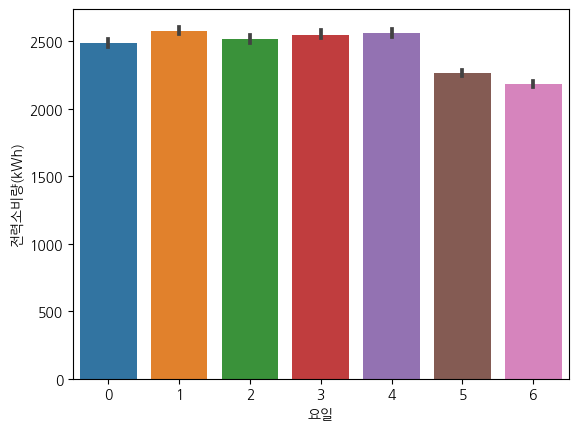

In [77]:
sns.barplot(data=train_df, x='요일', y='전력소비량(kWh)')

<Axes: xlabel='공휴일', ylabel='전력소비량(kWh)'>

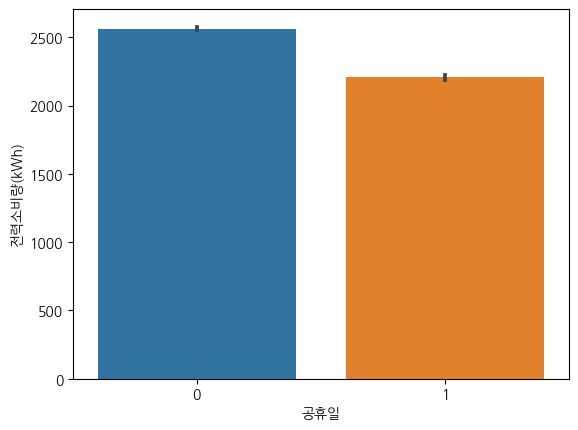

In [78]:
# 평일 공휴일 비교
sns.barplot(data=train_df, x='공휴일', y='전력소비량(kWh)')

In [74]:
# different patterns for weekdays and weekends+holidays
# 0 = weekdays, 1 = weekends & holidays (2022.06.01, 2022.06.06, 2022.08.15)
train_df['공휴일'] = np.where((train_df['요일']==5)|(train_df['요일']==6)|((train_df['month']==6)&(train_df['day']==1))|((train_df['month']==6)&(train_df['day']==6))|((train_df['month']==8)&(train_df['day']==15)), 1, 0)
test_df['공휴일'] = np.where((test_df['요일']==5)|(test_df['요일']==6)|((test_df['month']==6)&(test_df['day']==1))|((test_df['month']==6)&(test_df['day']==6))|((test_df['month']==8)&(test_df['day']==15)), 1, 0)

In [75]:
# time
# 0 = 0-5, 1 = 6-9, 2 = 10-16, 3 = 17-24
train_df['시간대'] = train_df['hour'].apply(lambda x: 0 if x<=5 else (1 if x>=6 and x<=9 else (2 if x>=10 and x<=16 else 3)))
test_df['시간대'] = test_df['hour'].apply(lambda x: 0 if x<=5 else (1 if x>=6 and x<=9 else (2 if x>=10 and x<=16 else 3)))

In [76]:
# '연면적'-'냉방면적'
train_df['면적차이']=train_df['연면적(m2)']-train_df['냉방면적(m2)']
test_df['면적차이']=test_df['연면적(m2)']-test_df['냉방면적(m2)']

In [79]:
# drop '일시'
train_df.drop(['일시'],axis=1,inplace=True)
test_df.drop(['일시'],axis=1,inplace=True)

In [80]:
# drop 'num_date_time'
train_df.drop(['num_date_time'],axis=1,inplace=True)
test_df.drop(['num_date_time'],axis=1,inplace=True)

## Standardisation

In [81]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [82]:
features = ['기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '연면적(m2)', '냉방면적(m2)', '태양광용량(kW)', '면적차이']
std.fit(train_df[features])
train_df[features] = std.transform(train_df[features])
test_df[features] = std.transform(test_df[features])

In [83]:
train_df

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),hour,day,month,요일,공휴일,시간대,면적차이
0,1,-1.837147,-0.173062,-0.908644,-2.434729,1085.28,0,-0.117980,-0.135309,-0.397768,0,1,6,2,1,0,-0.017415
1,1,-1.995898,-0.173062,-0.761381,-2.235794,1047.36,0,-0.117980,-0.135309,-0.397768,1,1,6,2,1,0,-0.017415
2,1,-2.075273,-0.173062,-0.466853,-2.235794,974.88,0,-0.117980,-0.135309,-0.397768,2,1,6,2,1,0,-0.017415
3,1,-2.339857,-0.173062,-0.540485,-2.036858,953.76,0,-0.117980,-0.135309,-0.397768,3,1,6,2,1,0,-0.017415
4,1,-1.890064,-0.173062,0.490362,-2.368417,986.40,0,-0.117980,-0.135309,-0.397768,4,1,6,2,1,0,-0.017415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,-0.646518,-0.173062,-0.908644,0.482988,881.04,11,-0.159703,-0.134880,-0.397768,19,24,8,2,0,3,-0.290344
203996,100,-0.831727,-0.173062,-0.614117,0.482988,798.96,11,-0.159703,-0.134880,-0.397768,20,24,8,2,0,3,-0.290344
203997,100,-1.122770,-0.173062,-0.835012,0.880859,825.12,11,-0.159703,-0.134880,-0.397768,21,24,8,2,0,3,-0.290344
203998,100,-1.202145,-0.173062,-1.350436,1.013482,640.08,11,-0.159703,-0.134880,-0.397768,22,24,8,2,0,3,-0.290344


In [84]:
test_df

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),hour,day,month,요일,공휴일,시간대,면적차이
0,1,-0.540684,-0.173062,0.048571,-0.445376,0,-0.117980,-0.135309,-0.397768,0,25,8,3,0,0,-0.017415
1,1,-0.672976,-0.173062,-0.908644,-0.445376,0,-0.117980,-0.135309,-0.397768,1,25,8,3,0,0,-0.017415
2,1,-0.752352,-0.173062,-0.466853,-0.246441,0,-0.117980,-0.135309,-0.397768,2,25,8,3,0,0,-0.017415
3,1,-0.911102,-0.173062,-0.614117,-0.047506,0,-0.117980,-0.135309,-0.397768,3,25,8,3,0,0,-0.017415
4,1,-0.990478,-0.173062,-0.835012,-0.113818,0,-0.117980,-0.135309,-0.397768,4,25,8,3,0,0,-0.017415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100,-0.805269,-0.173062,-0.908644,0.350365,11,-0.159703,-0.134880,-0.397768,19,31,8,2,0,3,-0.290344
16796,100,-1.281520,-0.173062,-1.276804,1.079794,11,-0.159703,-0.134880,-0.397768,20,31,8,2,0,3,-0.290344
16797,100,-1.413812,-0.173062,-1.276804,1.278729,11,-0.159703,-0.134880,-0.397768,21,31,8,2,0,3,-0.290344
16798,100,-1.440271,-0.173062,-0.761381,1.212418,11,-0.159703,-0.134880,-0.397768,22,31,8,2,0,3,-0.290344


## Feature selections

<Axes: >

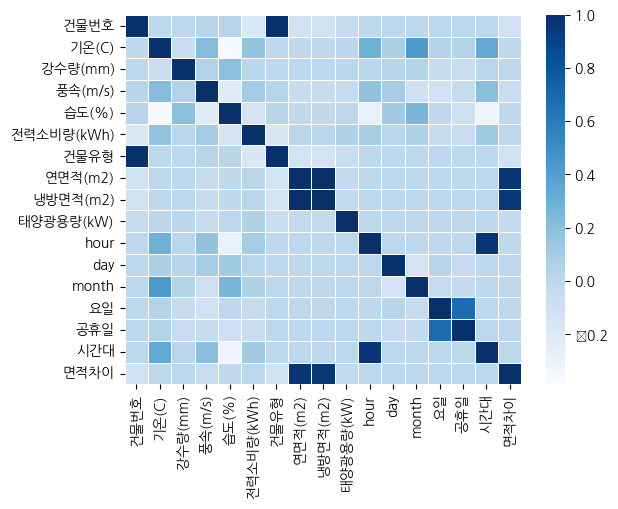

In [85]:
sns.heatmap(data = train_df.corr(), linewidths=.5, cmap='Blues')

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(train_df.values, i) for i in range(train_df.shape[1])]
vif["features"] = train_df.columns 

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,inf,냉방면적(m2)
1,inf,연면적(m2)
2,inf,면적차이
3,397.550363,건물번호
4,299.166749,건물유형
5,51.911686,hour
6,43.900668,시간대
7,19.751146,month
8,5.993846,요일
9,3.963164,day


- better with all features included

## Modelling for each types of buildings

In [87]:
for i in range(0,12):
    globals()['train_{}'.format(i)] = train_df[train_df['건물유형']==i]

In [88]:
for i in range(0,12):
    globals()['test_{}'.format(i)] = test_df[test_df['건물유형']==i]

In [89]:
# 건물유형 삭제
for i in range(0,12):
    eval('train_'+str(i)).drop(['건물유형'],axis=1,inplace=True)

In [90]:
for i in range(0,12):
    eval('test_'+str(i)).drop(['건물유형'],axis=1,inplace=True)

In [91]:
train_1

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),연면적(m2),냉방면적(m2),태양광용량(kW),hour,day,month,요일,공휴일,시간대,면적차이
30600,16,-1.678397,-0.173062,-0.835012,-1.904235,1194.72,-0.016371,-0.084068,-0.174794,0,1,6,2,1,0,0.358355
30601,16,-1.942981,-0.173062,-0.393221,-0.578000,1169.76,-0.016371,-0.084068,-0.174794,1,1,6,2,1,0,0.358355
30602,16,-2.022356,-0.173062,-0.761381,-0.445376,1201.44,-0.016371,-0.084068,-0.174794,2,1,6,2,1,0,0.358355
30603,16,-1.942981,-0.173062,-1.497700,-0.975870,1176.48,-0.016371,-0.084068,-0.174794,3,1,6,2,1,0,0.358355
30604,16,-2.075273,-0.173062,-1.276804,-0.776935,1271.04,-0.016371,-0.084068,-0.174794,4,1,6,2,1,0,0.358355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46915,23,-0.329017,-0.173062,-0.687749,0.549300,1198.80,-0.179539,-0.156508,-0.397768,19,24,8,2,0,3,-0.299466
46916,23,-0.540684,-0.173062,-0.614117,0.814547,1152.00,-0.179539,-0.156508,-0.397768,20,24,8,2,0,3,-0.299466
46917,23,-0.620060,-0.173062,-1.129540,0.814547,1133.40,-0.179539,-0.156508,-0.397768,21,24,8,2,0,3,-0.299466
46918,23,-0.620060,-0.173062,-1.497700,0.748235,1097.10,-0.179539,-0.156508,-0.397768,22,24,8,2,0,3,-0.299466


In [92]:
test_1

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),연면적(m2),냉방면적(m2),태양광용량(kW),hour,day,month,요일,공휴일,시간대,면적차이
2520,16,-1.334437,-0.173062,-0.982276,0.615612,-0.016371,-0.084068,-0.174794,0,25,8,3,0,0,0.358355
2521,16,-1.387354,-0.173062,-1.203172,0.681923,-0.016371,-0.084068,-0.174794,1,25,8,3,0,0,0.358355
2522,16,-1.387354,-0.173062,-0.908644,0.681923,-0.016371,-0.084068,-0.174794,2,25,8,3,0,0,0.358355
2523,16,-1.519646,-0.173062,-1.497700,0.947171,-0.016371,-0.084068,-0.174794,3,25,8,3,0,0,0.358355
2524,16,-1.599021,-0.173062,-1.276804,1.013482,-0.016371,-0.084068,-0.174794,4,25,8,3,0,0,0.358355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859,23,-0.805269,-0.173062,-0.614117,0.284053,-0.179539,-0.156508,-0.397768,19,31,8,2,0,3,-0.299466
3860,23,-0.911102,-0.173062,-0.761381,0.615612,-0.179539,-0.156508,-0.397768,20,31,8,2,0,3,-0.299466
3861,23,-0.937561,-0.173062,-1.055908,0.748235,-0.179539,-0.156508,-0.397768,21,31,8,2,0,3,-0.299466
3862,23,-1.202145,-0.173062,-1.497700,0.880859,-0.179539,-0.156508,-0.397768,22,31,8,2,0,3,-0.299466


## Modelling

In [94]:
X = train_1.drop('전력소비량(kWh)',axis=1)
y = train_1['전력소비량(kWh)']

In [97]:
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=False)

In [98]:
# Random Forest Regression
model = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: -0.3624769132067382


## Submission

In [99]:
for i in range(0,12):
    globals()['X_train_{}'.format(i)] = eval('train_'+str(i)).drop(['전력소비량(kWh)'],axis=1)
    globals()['y_train_{}'.format(i)] = eval('train_'+str(i))['전력소비량(kWh)']

    best_model.fit(eval('X_train_'+str(i)), eval('y_train_'+str(i)))
    
    globals()['y_pred_{}'.format(i)] = best_model.predict(eval('test_'+str(i)))

In [100]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,num_date_time,answer
0,1_20220825 00,0
1,1_20220825 01,0
2,1_20220825 02,0
3,1_20220825 03,0
4,1_20220825 04,0
...,...,...
16795,100_20220831 19,0
16796,100_20220831 20,0
16797,100_20220831 21,0
16798,100_20220831 22,0


In [101]:
y_pred = np.concatenate((y_pred_0, y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5, y_pred_6, y_pred_7, y_pred_8, y_pred_9, y_pred_10, y_pred_11))

In [102]:
len(y_pred)

16800

In [103]:
sample_submission['answer'] = y_pred
sample_submission

,num_date_time,answer
0,1_20220825 00,2054.795443
1,1_20220825 01,2037.158483
2,1_20220825 02,1939.135232
3,1_20220825 03,1956.824549
4,1_20220825 04,1975.076619
...,...,...
16795,100_20220831 19,863.982428
16796,100_20220831 20,745.572824
16797,100_20220831 21,720.752530
16798,100_20220831 22,606.391343


In [104]:
sample_submission.to_csv('submission.csv', index=False)